In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
from pandas.stats.api import ols
matplotlib.style.use('ggplot')
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
from sklearn import linear_model
import plotly
from plotly.graph_objs import *

In [6]:
mpg_data = pd.read_csv('Ex04_Mpg_Regression.csv')
mpg_data.carname = pd.Categorical(mpg_data.carname).codes
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
modelyear         int64
origin            int64
carname           int16
dtype: object

In [39]:
#mpg_data[mpg_data.values == '?']
mpg_data = mpg_data[[np.all(values) for values in mpg_data.values!='?']]

In [40]:
columns = mpg_data.describe().columns
for col in columns:
    mpg_data[col] = mpg_data[col].apply(lambda x :(x-mpg_data[col].mean())/mpg_data[col].std())

In [41]:
mpg_data.describe()

,mpg,cylinders,displacement,weight,acceleration,modelyear,origin,carname
count,3.910000e+02,3.910000e+02,391.000000,391.000000,3.910000e+02,3.910000e+02,3.910000e+02,3.910000e+02
mean,-1.453796e-16,5.451735e-17,0.000000,0.000000,-1.817245e-17,-2.180694e-16,2.725867e-17,4.088801e-17
std,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.851422e+00,-1.447594e+00,-1.205516,-1.603674,-2.739063e+00,-1.630828e+00,-7.171098e-01,-1.659675e+00
25%,-8.271115e-01,-8.604475e-01,-0.851863,-0.884323,-6.349890e-01,-8.147185e-01,-7.171098e-01,-9.280770e-01
50%,-5.887823e-02,-8.604475e-01,-0.412187,-0.207321,-1.827774e-02,1.391492e-03,-7.171098e-01,4.570612e-03
75%,7.093550e-01,1.488139e+00,0.672666,0.753186,5.440178e-01,8.175014e-01,5.235536e-01,8.590322e-01
max,2.962839e+00,1.488139e+00,2.493499,2.545387,3.355496e+00,1.633611e+00,1.764217e+00,1.735833e+00


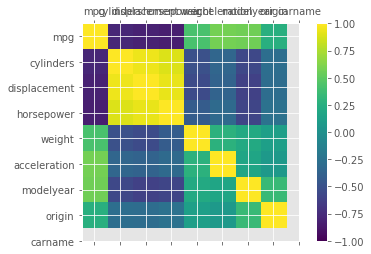

,mpg,cylinders,displacement,weight,acceleration,modelyear,origin,carname
mpg,1.000000,-0.777643,-0.804899,-0.832065,0.422188,0.579960,0.564652,0.265444
cylinders,-0.777643,1.000000,0.950824,0.898146,-0.502281,-0.341595,-0.568186,-0.273986
displacement,-0.804899,0.950824,1.000000,0.933129,-0.542209,-0.367163,-0.613875,-0.288583
weight,-0.832065,0.898146,0.933129,1.000000,-0.415883,-0.307733,-0.584540,-0.249918
acceleration,0.422188,-0.502281,-0.542209,-0.415883,1.000000,0.286547,0.210975,0.131810
modelyear,0.579960,-0.341595,-0.367163,-0.307733,0.286547,1.000000,0.179273,0.071258
origin,0.564652,-0.568186,-0.613875,-0.584540,0.210975,0.179273,1.000000,0.356617
carname,0.265444,-0.273986,-0.288583,-0.249918,0.131810,0.071258,0.356617,1.000000


In [42]:
correlations = mpg_data.corr()
fig = plt.figure()
names = mpg_data.columns
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

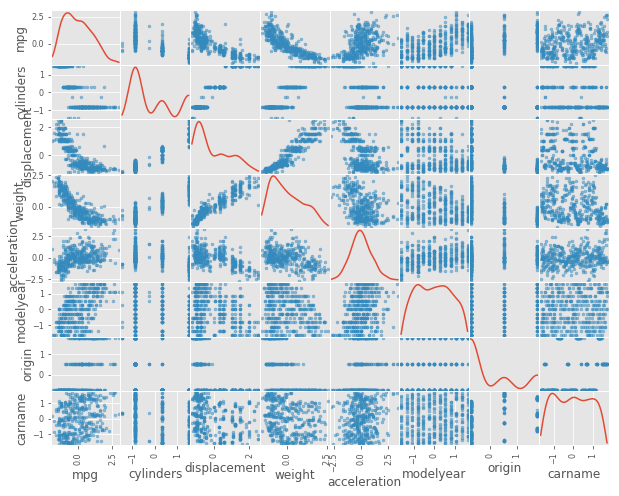

In [43]:
scatter_matrix(mpg_data, diagonal='kde', figsize=(10,8))
plt.show()

In [44]:
splitend = int(0.8 * len(mpg_data))
mpg_data_shuffled = mpg_data.sample(frac=1)
train, test = mpg_data_shuffled[:splitend], mpg_data_shuffled[splitend:]
x_train = train.ix[:, :-1]
y_train = train.ix[:, -1]
x_test = test.ix[:, :-1]
y_test = test.ix[:, -1]

## Lasso

In [81]:
alphas_lasso = np.linspace(1, 10, 1000)
fdf=pd.DataFrame()
model = linear_model.Lasso()
coeff = []
for a in alphas_lasso:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_lasso, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,alphas
0,0.0,-0.0,-0.0,-0.005365,-0.0,-0.0,0.0,0.0,1.000000
1,0.0,-0.0,-0.0,-0.005359,-0.0,-0.0,0.0,0.0,1.009009
2,0.0,-0.0,-0.0,-0.005352,-0.0,-0.0,0.0,0.0,1.018018
3,0.0,-0.0,-0.0,-0.005345,-0.0,-0.0,0.0,0.0,1.027027
4,0.0,-0.0,-0.0,-0.005339,-0.0,-0.0,0.0,0.0,1.036036


In [82]:
trace0 = Scatter(
    x = alphas_lasso,
    y = fdf['cylinders'],
    name = 'cylinders',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_lasso,
    y = fdf['displacement'],
    name = 'displacement',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_lasso,
    y = fdf['horsepower'],
    name = 'horsepower',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_lasso,
    y = fdf['weight'],
    name = 'weight',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_lasso,
    y = fdf['acceleration'],
    name = 'acceleration',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas_lasso,
    y = fdf['modelyear'],
    name = 'modelyear',
    line = dict(
        color = ('rgb(102, 46, 100)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas_lasso,
    y = fdf['origin'],
    name = 'origin',
    line = dict(
        color = ('rgb(140, 40, 203)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='LassoRegression.html')

'file:///home/user/ml_regression/MpgDataset/LassoRegression.html'

## LassoCV

In [83]:
lassocv = linear_model.LassoCV(alphas=alphas_lasso, cv=10, max_iter=100000)

In [84]:
lassocv.fit(x_train, y_train)
predictions = lassocv.predict(x_test)
for i, j in zip(x_train.columns, lassocv.coef_):
    print (i, j)

mpg 0.0
cylinders -0.0
displacement -0.0
horsepower -0.005365324862
weight -0.0
acceleration -0.0
modelyear 0.0
origin 0.0


In [85]:
np.mean((y_test - predictions)**2)**0.5

0.89946948205985211

In [86]:
lassocv.alpha_

1.0

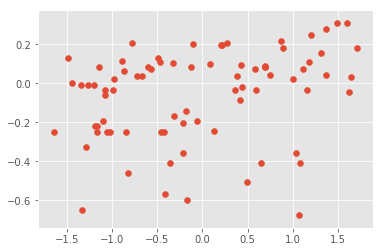

In [87]:
plt.scatter(y_test, predictions)
#plt.plot(y_test, predictions)
plt.show()

## Ridge

In [98]:
alphas_ridge = np.linspace(-1,5,100)
fdf=pd.DataFrame()
model = linear_model.Ridge()
coeff = []
for a in alphas_ridge:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_ridge, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,alphas
0,0.169833,0.024310,-0.364559,-0.003600,0.456335,-0.096859,-0.067799,0.290893,-1.000000
1,0.169214,0.023544,-0.362086,-0.003598,0.454321,-0.096502,-0.067464,0.291017,-0.939394
2,0.168601,0.022793,-0.359649,-0.003595,0.452327,-0.096148,-0.067132,0.291139,-0.878788
3,0.167994,0.022057,-0.357245,-0.003592,0.450352,-0.095796,-0.066803,0.291257,-0.818182
4,0.167393,0.021334,-0.354876,-0.003589,0.448395,-0.095448,-0.066478,0.291371,-0.757576


In [99]:
trace0 = Scatter(
    x = alphas_ridge,
    y = fdf['cylinders'],
    name = 'cylinders',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_ridge,
    y = fdf['displacement'],
    name = 'displacement',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_ridge,
    y = fdf['horsepower'],
    name = 'horsepower',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_ridge,
    y = fdf['weight'],
    name = 'weight',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_ridge,
    y = fdf['acceleration'],
    name = 'acceleration',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas_ridge,
    y = fdf['modelyear'],
    name = 'modelyear',
    line = dict(
        color = ('rgb(102, 46, 100)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas_ridge,
    y = fdf['origin'],
    name = 'origin',
    line = dict(
        color = ('rgb(140, 40, 203)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='RidgeRegression.html')

'file:///home/user/ml_regression/MpgDataset/RidgeRegression.html'

## RidgeCV

In [100]:
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge, scoring='neg_mean_squared_error')
ridgecv.fit(x_train, y_train) 

RidgeCV(alphas=array([-1.     , -0.93939, ...,  4.93939,  5.     ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [101]:
predictions = ridgecv.predict(x_test)
for i, j in zip(x_train.columns, ridgecv.coef_):
    print (i, j) 

mpg 0.12861682313
cylinders -0.0121059790434
displacement -0.221285704519
horsepower -0.00320885463714
weight 0.31905070756
acceleration -0.0716068954507
modelyear -0.0452109344327
origin 0.293921137303


In [102]:
ridgecv.alpha_

5.0

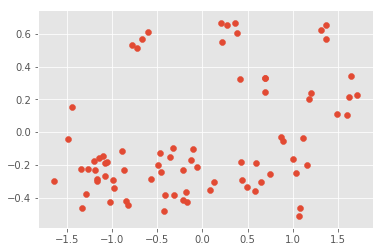

In [103]:
plt.scatter(y_test, predictions)
#plt.plot(y_test, predictions)
plt.show() 

## OLS model

In [108]:
model_ols = sm.ols(formula='mpg ~ displacement + weight + origin', data=train).fit()

In [109]:
predictions = model_ols.predict(x_test)

In [110]:
np.mean((predictions - y_test)**2)**0.5

1.1125585197036019

In [111]:
residuals = predictions - y_test

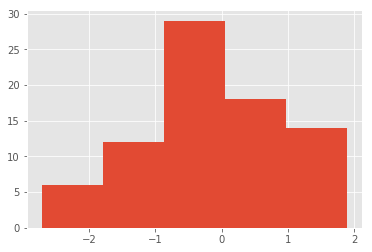

In [114]:
plt.hist(residuals, bins=5)
plt.show()

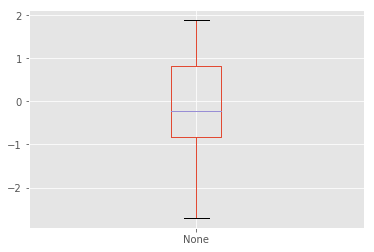

In [115]:
residuals.plot(kind='box')
plt.show()

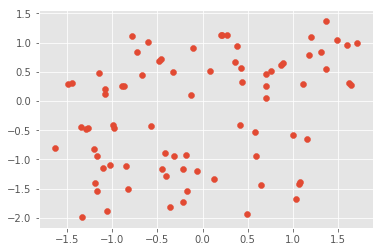

In [116]:
plt.scatter(y_test, predictions)
plt.show()